<a href="https://colab.research.google.com/github/ZeeshanAhmed95/Capstone-Data-Application-linear-regression/blob/main/Captsone_Project_Data_Application_Energy(Linear_Regression)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px  
from datetime import datetime 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
df = pd.read_csv('/content/drive/MyDrive/data_application_energy.csv',parse_dates=['date'])

In [5]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [7]:
df.shape

(19735, 29)

In [8]:
df.describe(include= "all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889


In [9]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9da21a0ed0>,
      dtype=object)

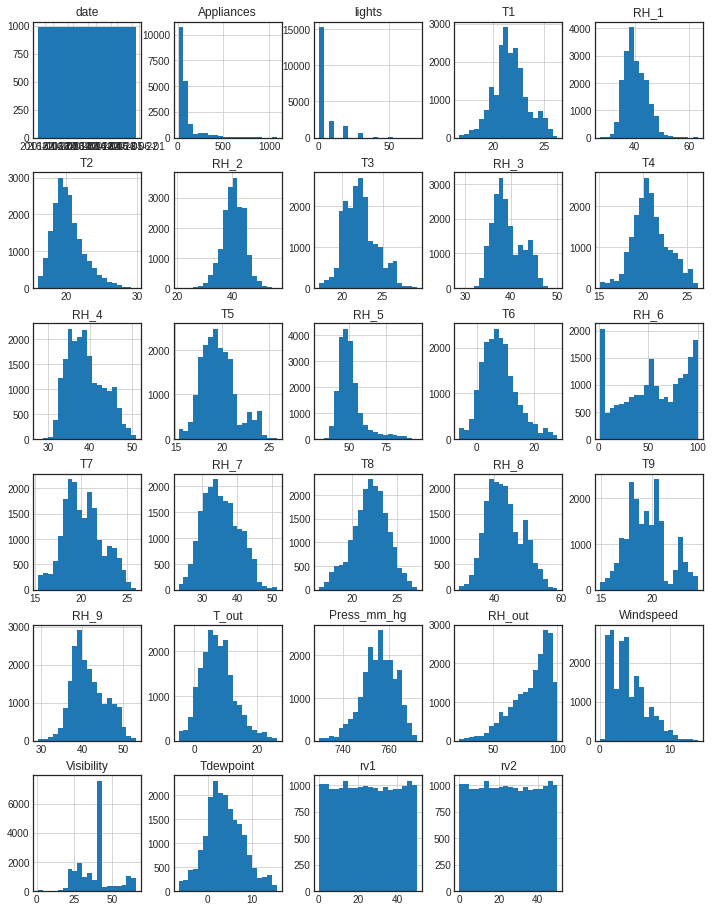

In [10]:
df.hist(bins = 20 , figsize= (12,16))

Text(1, 17, 'y = 88.01 + 2.55x')

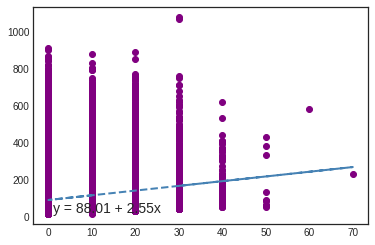

In [11]:
#@title
x =df["lights"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 20.93 + 3.54x')

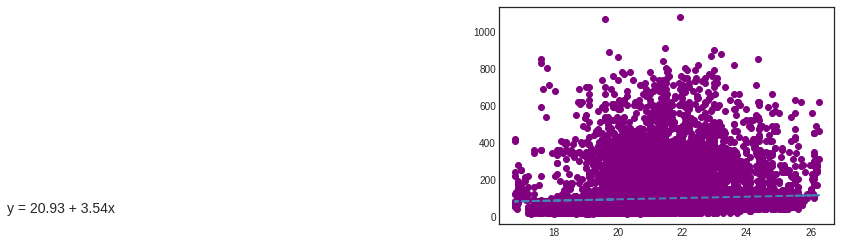

In [12]:
#@title
x =df["T1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 8.46 + 2.22x')

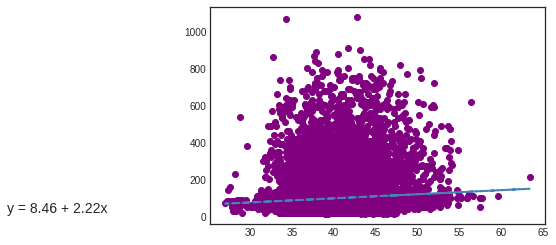

In [13]:
#@title
x =df["RH_1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = -16.49 + 5.61x')

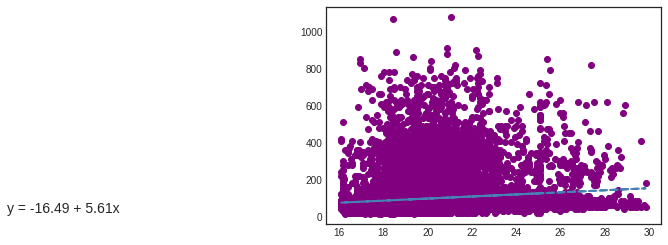

In [14]:
#@title
x =df["T2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 159.26 + -1.52x')

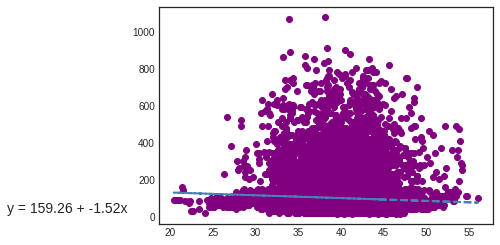

In [15]:
#@title
x =df["RH_2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 0.90 + 4.35x')

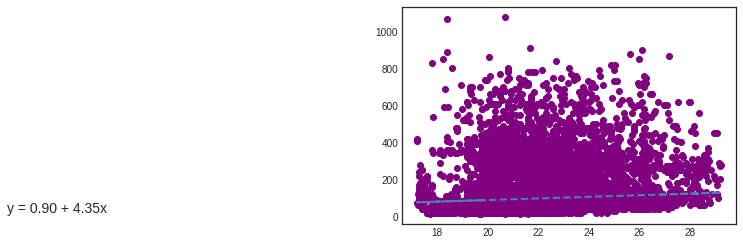

In [16]:
#@title
x =df["T3"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 52.83 + 1.14x')

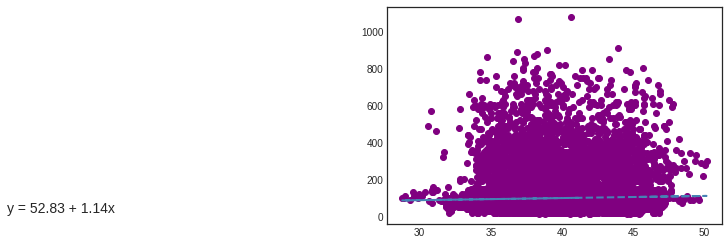

In [17]:
#@title
x =df["RH_3"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 55.53 + 2.02x')

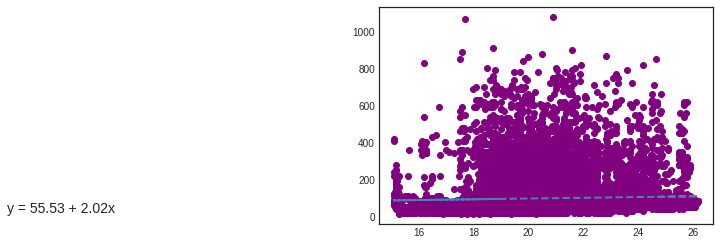

In [18]:
#@title
x =df["T4"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.06 + 0.40x')

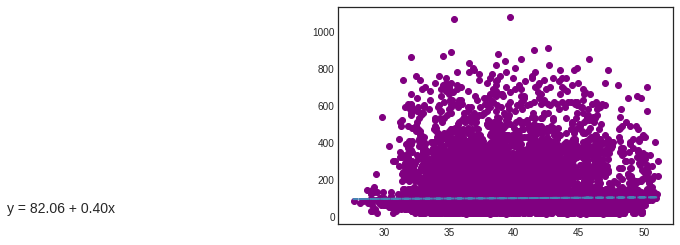

In [19]:
#@title
x =df["RH_4"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 76.18 + 1.10x')

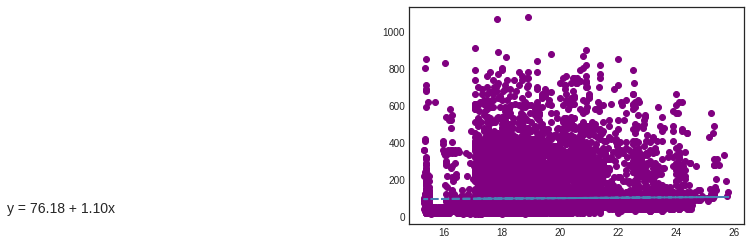

In [20]:
#@title Default title text
x =df["T5"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 93.67 + 0.08x')

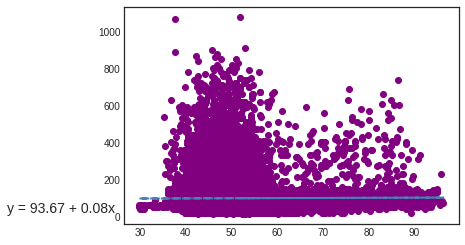

In [21]:
#@title Default title text
x =df["RH_5"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.03 + 1.98x')

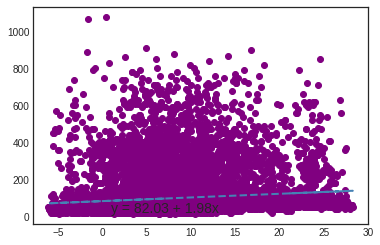

In [22]:
#@title
x =df["T6"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 112.65 + -0.27x')

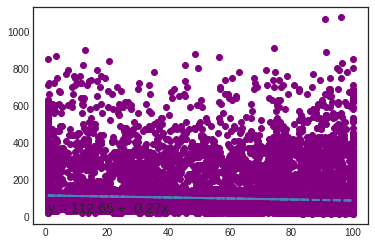

In [23]:
#@title
x =df["RH_6"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 72.29 + 1.25x')

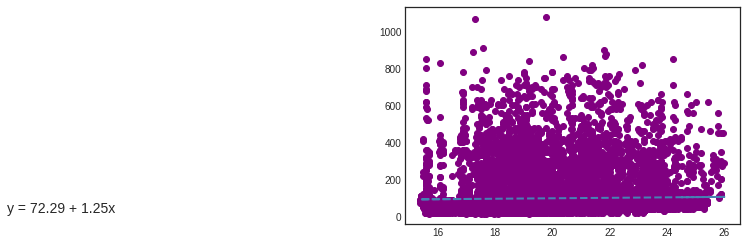

In [24]:
#@title
x =df["T7"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 137.17 + -1.12x')

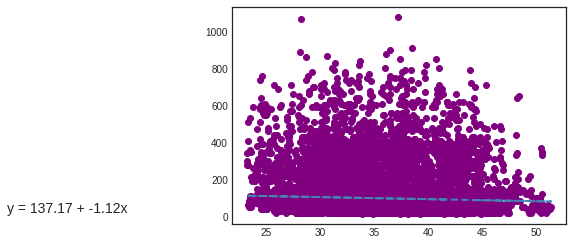

In [25]:
#@title
x =df["RH_7"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 52.01 + 2.07x')

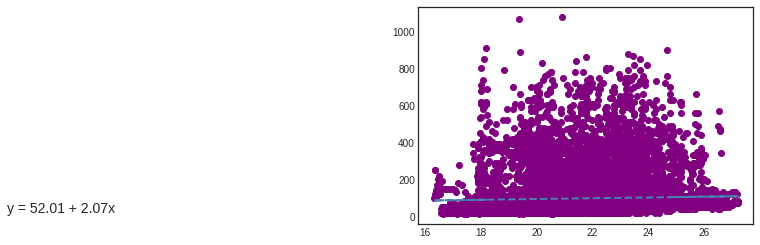

In [26]:
#@title
x =df["T8"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 176.93 + -1.85x')

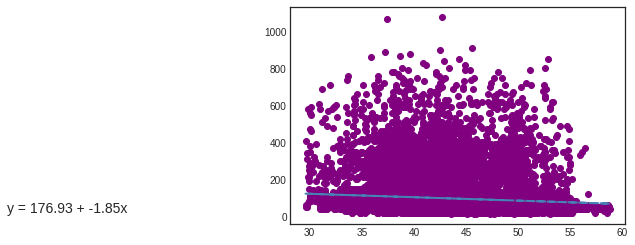

In [27]:
#@title
x =df["RH_8"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 87.77 + 0.51x')

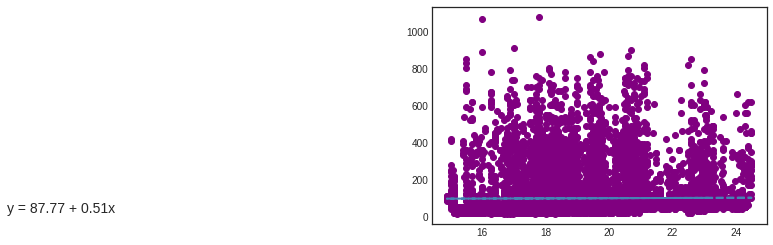

In [28]:
#@title
x =df["T9"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 150.50 + -1.27x')

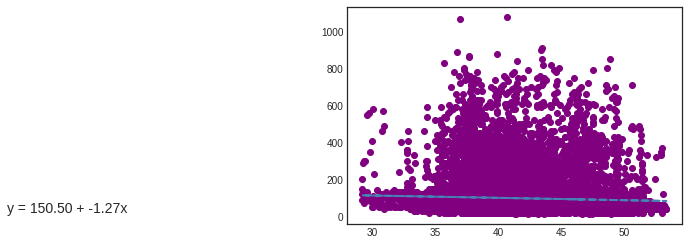

In [29]:
#@title
x =df["RH_9"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 83.53 + 1.91x')

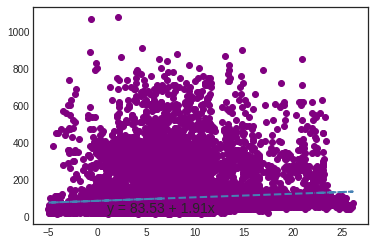

In [30]:
#@title
x =df["T_out"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

In [31]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Text(1, 17, 'y = 462.88 + -0.48x')

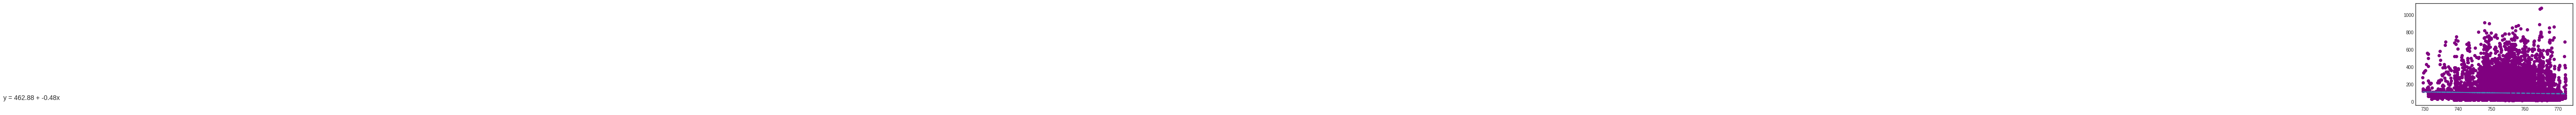

In [32]:
#@title
x =df["Press_mm_hg"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 181.25 + -1.05x')

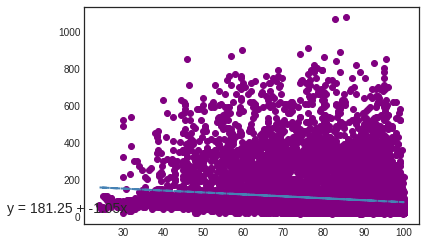

In [33]:
#@title
x =df["RH_out"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 82.97 + 3.64x')

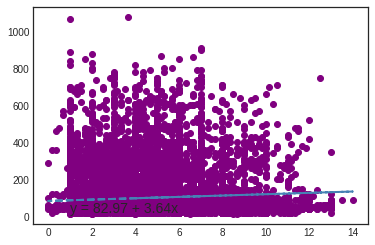

In [34]:
#@title
x =df["Windspeed"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 97.62 + 0.00x')

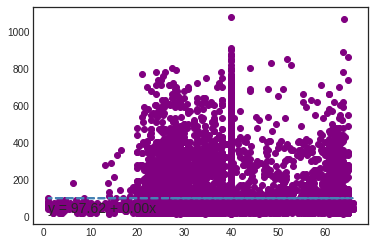

In [35]:
#@title
x =df["Visibility"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 96.28 + 0.38x')

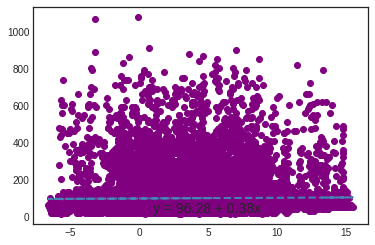

In [36]:
#@title
x =df["Tdewpoint"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 99.66 + -0.08x')

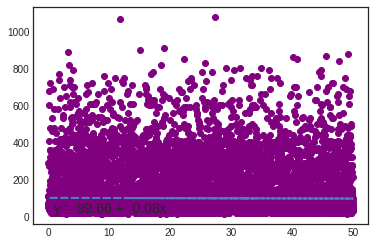

In [37]:
#@title
x =df["rv1"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

Text(1, 17, 'y = 99.66 + -0.08x')

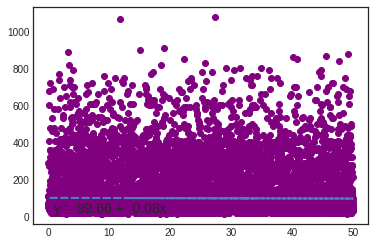

In [38]:
#@title
x =df["rv2"]
y =df['Appliances']

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)

In [60]:
df = df.set_index('date')

In [61]:
df['month'] = df.index.month
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['week'] = df.index.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [41]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,weekday,hour,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,5,4,17,21
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,5,4,17,21
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,5,4,17,21


In [42]:
df['week'].value_counts()

12    1008
20    1008
18    1008
17    1008
16    1008
15    1008
14    1008
13    1008
3     1008
11    1008
10    1008
9     1008
8     1008
7     1008
6     1008
5     1008
4     1008
19    1008
2      906
21     685
Name: week, dtype: int64

In [43]:
df.weekday.value_counts()

1    2880
2    2880
3    2880
4    2845
0    2778
5    2736
6    2736
Name: weekday, dtype: int64

In [44]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'month', 'weekday', 'hour', 'week'],
      dtype='object')

In [51]:
df['day_of_week'] = df['date'].dt.day_name()

In [52]:
df['Date'] = df['date']

In [53]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,day_of_week,Date
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Monday,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Monday,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Monday,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Monday,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Monday,2016-01-11 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,Friday,2016-05-27 17:20:00
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,Friday,2016-05-27 17:30:00
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,Friday,2016-05-27 17:40:00
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,Friday,2016-05-27 17:50:00


In [57]:
df['Type of week'] = ((pd.to_datetime(df['Date']).dt.dayofweek)// 5 == 1).astype(int)
df['Type of week'].value_counts()
# There are 5472 weekend recordings 

0    14263
1     5472
Name: Type of week, dtype: int64

In [62]:
df.groupby('hour')['Appliances'].mean().sort_values( ascending= False)

hour
18    190.364520
17    161.352657
19    143.065693
11    133.126521
20    126.982968
10    125.377129
13    124.744526
12    123.637470
16    119.902676
9     112.785888
14    108.284672
8     106.143552
15    105.827251
21     96.496350
7      78.649635
22     69.148418
6      57.712895
23     56.982968
0      52.785888
5      52.737226
1      51.326034
4      49.355231
2      49.075426
3      48.236010
Name: Appliances, dtype: float64

In [59]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,day_of_week,Date,Type of week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Monday,2016-01-11 17:00:00,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Monday,2016-01-11 17:10:00,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Monday,2016-01-11 17:20:00,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,Monday,2016-01-11 17:30:00,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,Monday,2016-01-11 17:40:00,0


In [63]:
# At 18th hour, the usage of appliances is at max

In [ ]:
df.groupby('weekday')['Appliances'].mean().sort_values( ascending= False)

In [65]:
# On Sunday, the usage of appliances is at max

In [66]:
df.groupby('week')['Appliances'].mean().sort_values( ascending= False)

week
2     121.953642
14    116.230159
11    113.581349
6     113.164683
21    107.912409
15    105.674603
5      98.888889
9      97.251984
3      96.190476
7      95.704365
17     95.704365
19     95.654762
12     95.218254
16     94.166667
20     93.561508
10     90.674603
8      87.996032
18     83.541667
13     81.101190
4      75.456349
Name: Appliances, dtype: float64

In [67]:
# On week 2 , the usage of appliances is at max

In [68]:
df.groupby('month')['Appliances'].mean().sort_values( ascending= False)

month
2    100.945881
4     98.888889
1     97.026010
3     96.953405
5     94.199325
Name: Appliances, dtype: float64

In [69]:
df['month'].value_counts()

3    4464
4    4320
2    4176
5    3853
1    2922
Name: month, dtype: int64

In [70]:
# From the data in the period of months Jan to May, the appliances usage is max on Feb

In [71]:
df.drop

<bound method DataFrame.drop of                      Appliances  lights         T1       RH_1         T2  \
date                                                                       
2016-01-11 17:00:00          60      30  19.890000  47.596667  19.200000   
2016-01-11 17:10:00          60      30  19.890000  46.693333  19.200000   
2016-01-11 17:20:00          50      30  19.890000  46.300000  19.200000   
2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
2016-01-11 17:40:00          60      40  19.890000  46.333333  19.200000   
...                         ...     ...        ...        ...        ...   
2016-05-27 17:20:00         100       0  25.566667  46.560000  25.890000   
2016-05-27 17:30:00          90       0  25.500000  46.500000  25.754000   
2016-05-27 17:40:00         270      10  25.500000  46.596667  25.628571   
2016-05-27 17:50:00         420      10  25.500000  46.990000  25.414000   
2016-05-27 18:00:00         430      10  25.500000  46.6

In [72]:
gg = list(df.describe().columns)
g = ['month', 'weekday', 'hour', 'week','WEEKDAY', 'Type of week']


In [73]:
gg

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'Type of week',
 'month',
 'weekday',
 'hour',
 'week']

In [74]:
gg.remove('Type of week')

In [76]:
gg

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2',
 'month',
 'weekday',
 'hour',
 'week']

In [77]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [78]:
for col in gg:
  outliers = find_outliers_IQR(df[col])
  print(f"column name is {col}")
  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))
  
  outliers

column name is Appliances
number of outliers: 2138
max outlier value: 1080
min outlier value: 180
column name is lights
number of outliers: 4483
max outlier value: 70
min outlier value: 10
column name is T1
number of outliers: 515
max outlier value: 26.26
min outlier value: 16.79
column name is RH_1
number of outliers: 146
max outlier value: 63.36
min outlier value: 27.0233333333333
column name is T2
number of outliers: 546
max outlier value: 29.8566666666667
min outlier value: 25.566666666666695
column name is RH_2
number of outliers: 235
max outlier value: 56.0266666666667
min outlier value: 20.463333333333296
column name is T3
number of outliers: 217
max outlier value: 29.236
min outlier value: 27.045909090909095
column name is RH_3
number of outliers: 15
max outlier value: 50.1633333333333
min outlier value: 28.7666666666667
column name is T4
number of outliers: 186
max outlier value: 26.2
min outlier value: 15.1
column name is RH_4
number of outliers: 0
max outlier value: nan
min 

In [79]:
df.shape

(19735, 35)

In [80]:
df.isna().sum()

Appliances      0
lights          0
T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
rv1             0
rv2             0
day_of_week     0
Date            0
Type of week    0
month           0
weekday         0
hour            0
week            0
dtype: int64

In [81]:
df1 = df.copy()

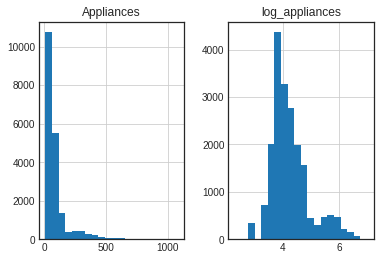

In [82]:
df1['log_appliances'] = np.log(df.Appliances) 
appliance = ["Appliances","log_appliances"]
appliance=df1[appliance]
appliance.hist(bins = 20 ) ;

In [83]:
#We have applied log transformation to the column appliance which is skewed towards right and the compared the distributions

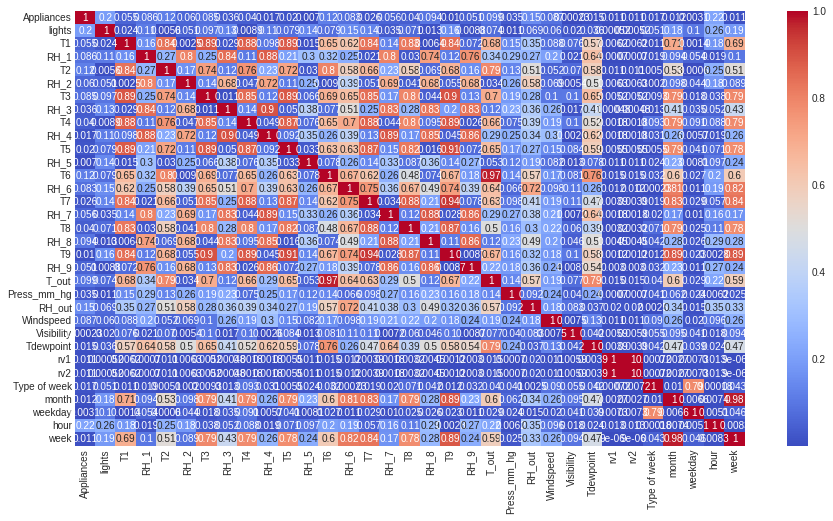

In [84]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [85]:
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [86]:
considered_features = gg.copy()

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



,Variable,VIF
26,rv1,inf
27,rv2,inf
20,T_out,156.053594
25,Tdewpoint,88.056412
22,RH_out,53.095564
31,week,34.805196
12,T6,34.632101
18,T9,32.498681
4,T2,29.157393
28,month,28.514021


In [88]:
considered_features.remove('rv1')
considered_features.remove('rv2')

In [89]:

compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
20,T_out,156.050945
25,Tdewpoint,88.054979
22,RH_out,53.094067
29,week,34.800344
12,T6,34.631418
18,T9,32.495605
4,T2,29.157185
26,month,28.509733
5,RH_2,22.250173
2,T1,20.230743


In [90]:
considered_features.remove('T_out')

In [91]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
28,week,34.800257
18,T9,32.043008
4,T2,28.745109
25,month,27.832922
12,T6,26.816872
5,RH_2,21.988481
24,Tdewpoint,21.169128
2,T1,19.906209
9,RH_4,17.885849
14,T7,17.806245


In [92]:
considered_features.remove('Tdewpoint')

In [93]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
27,week,34.759934
18,T9,32.040872
4,T2,28.205929
24,month,27.433809
5,RH_2,21.919458
2,T1,19.527086
14,T7,17.805673
9,RH_4,17.682202
3,RH_1,16.583145
13,RH_6,11.282952


In [94]:
considered_features.remove('T9')

In [95]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
26,week,34.286464
4,T2,27.305379
23,month,27.235694
5,RH_2,21.234350
2,T1,18.887921
9,RH_4,17.659443
3,RH_1,16.554888
14,T7,12.893037
13,RH_6,11.281612
7,RH_3,11.100521


In [96]:
considered_features.remove('T7')

In [97]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
25,week,33.644073
4,T2,27.304070
22,month,27.009783
5,RH_2,21.230362
2,T1,18.887808
9,RH_4,17.405459
3,RH_1,16.536689
13,RH_6,11.262123
7,RH_3,11.093708
6,T3,10.894584


In [98]:
considered_features.remove('T2')

In [99]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
24,week,33.534635
21,month,26.974272
8,RH_4,16.285026
2,T1,12.404683
12,RH_6,11.224066
6,RH_3,10.928089
5,T3,10.894436
3,RH_1,10.681739
13,RH_7,8.969551
9,T5,8.881001


In [100]:
considered_features.remove('RH_4')

In [101]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
23,week,33.465291
20,month,26.626786
2,T1,11.773112
11,RH_6,11.196453
5,T3,10.813420
6,RH_3,10.341865
3,RH_1,9.805996
8,T5,8.650988
12,RH_7,8.523205
7,T4,7.611164


In [102]:
considered_features.remove('T1')

In [103]:
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
22,week,32.954966
19,month,26.621745
10,RH_6,11.141964
5,RH_3,10.197183
2,RH_1,9.615510
11,RH_7,8.410678
4,T3,8.340440
7,T5,8.093658
13,RH_8,7.546955
9,T6,6.803679


In [104]:
considered_features.remove('RH_1')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
21,week,32.927091
18,month,26.621167
9,RH_6,11.123048
10,RH_7,8.408766
3,T3,8.339202
6,T5,8.093147
4,RH_3,7.964273
12,RH_8,7.538512
5,T4,6.729214
13,RH_9,6.595758


In [105]:
considered_features.remove('RH_6')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
20,week,30.648848
17,month,26.586476
9,RH_7,8.387572
3,T3,8.326164
6,T5,8.091995
4,RH_3,7.931226
11,RH_8,7.468086
5,T4,6.722422
12,RH_9,6.589435
8,T6,5.985408


In [106]:
considered_features.remove('RH_7')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
19,week,30.416111
16,month,26.112387
3,T3,8.282941
6,T5,7.926019
4,RH_3,7.679487
5,T4,6.650417
11,RH_9,6.248241
10,RH_8,6.183760
8,T6,5.380407
9,T8,4.938429


In [107]:
considered_features.remove('T5')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
18,week,30.415660
15,month,25.852609
4,RH_3,7.663104
3,T3,7.513844
10,RH_9,6.248230
9,RH_8,6.170721
5,T4,5.847886
7,T6,5.378702
8,T8,4.556269
12,RH_out,4.132010


In [108]:
considered_features.remove('T3')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
17,week,28.470833
14,month,25.793974
3,RH_3,7.443049
8,RH_8,6.156153
9,RH_9,6.030119
6,T6,5.365628
4,T4,5.083240
11,RH_out,4.132004
7,T8,4.090044
2,RH_2,3.615195


In [109]:
considered_features.remove('RH_8')
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
16,week,28.234071
13,month,25.545580
3,RH_3,6.402362
8,RH_9,5.330234
6,T6,5.201848
4,T4,5.080152
7,T8,4.086669
10,RH_out,3.681860
2,RH_2,3.604766
15,hour,1.632848


In [110]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Tdewpoint,rv1,rv2,day_of_week,Date,Type of week,month,weekday,hour,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,5.3,13.275433,13.275433,Monday,2016-01-11 17:00:00,0,1,0,17,2
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,5.2,18.606195,18.606195,Monday,2016-01-11 17:10:00,0,1,0,17,2
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,5.1,28.642668,28.642668,Monday,2016-01-11 17:20:00,0,1,0,17,2
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,5.0,45.410389,45.410389,Monday,2016-01-11 17:30:00,0,1,0,17,2
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.9,10.084097,10.084097,Monday,2016-01-11 17:40:00,0,1,0,17,2
